<a href="https://colab.research.google.com/github/MayooranT/Fundamentals-of-Image-Processing/blob/main/Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1) Carry out following operations
#### a) Histogram computation

In [26]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


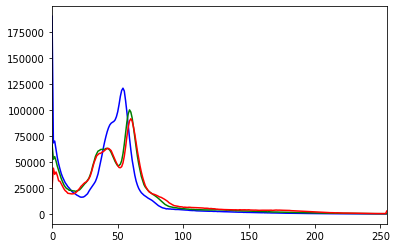

In [27]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

imgo=cv.imread('/content/drive/MyDrive/docements/CoLab files/a01images/im07.png', cv.IMREAD_COLOR)
channels = ['b', 'g', 'r'] # since cv reads img as BGR channel order
for i, col in enumerate(channels):
    histogram = cv.calcHist([imgo], [i], None, [256], [0,256]) #calcHist(sourceimage, channels, mask, histSize, ranges )
    plt.plot(histogram, color = col)
    plt.xlim([0, 255])
plt.show()

#### b) Histogram equalization

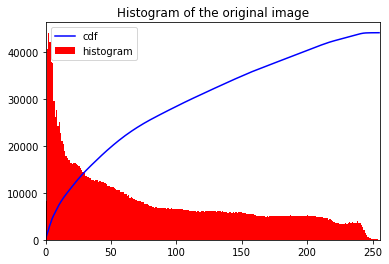

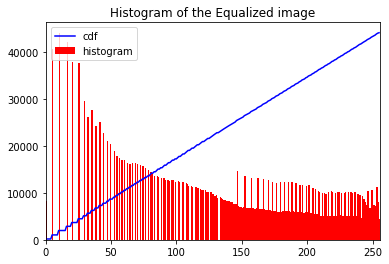

In [28]:
img=cv.imread('/content/drive/MyDrive/docements/CoLab files/a01images/im01.png', cv.IMREAD_GRAYSCALE)

hist,bins = np.histogram(img.ravel(),256,[0,256]) #histogram of a flattened list
cdf=hist.cumsum()  #cumulative sum
cdf_normalized=cdf*hist.max()/cdf.max()
plt.plot(cdf_normalized,color='b')
plt.hist(img.flatten(),256,[0,256],color='r')  #flatten: stack all the layers to a single layer
plt.xlim([0,256])
plt.legend(('cdf','histogram'),loc='upper left')
plt.title('Histogram of the original image')
plt.show()

equ=cv.equalizeHist(img)
hist,bins=np.histogram(equ.ravel(),256,[0,256])
cdf=hist.cumsum()
cdf_normalized=cdf*hist.max()/cdf.max()
plt.plot(cdf_normalized,color='b')
plt.hist(equ.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'),loc='upper left')
plt.title('Histogram of the Equalized image')
plt.show()

#### c) Intensity transformation

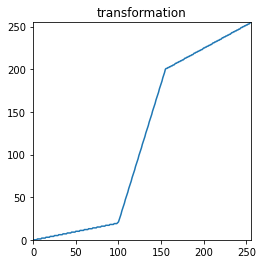

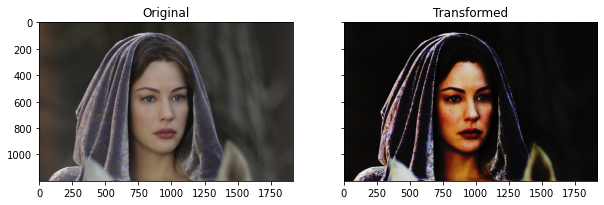

In [29]:
imgo=cv.imread('/content/drive/MyDrive/docements/CoLab files/a01images/im02.png', cv.IMREAD_COLOR)
img=cv.cvtColor(imgo, cv.COLOR_BGR2RGB)
a, b = [20,200]

tr1 = np.linspace(0,a,100).astype('uint8')
tr2 = np.linspace(a+1,b,56).astype('uint8')
tr3 = np.linspace(b+1,255,100).astype('uint8')

transf = np.concatenate((tr1, tr2), axis = 0)
transf = np.concatenate((transf, tr3), axis = 0)

fig, ax = plt.subplots()
ax.plot(transf)
ax.set_title('transformation')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')  #determine the aspect ratio of the plot
plt.show()

fig, ax = plt.subplots(1,2,sharex='all', sharey='all', figsize=(10,10))
ax[0].imshow(img, cmap ='gray', vmin = 0, vmax = 255)
ax[0].set_title('Original')

img2 = cv.LUT(img, transf)  #LookUp table
ax[1].imshow(img2, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('Transformed')
plt.show()

#### d) Gamma correction

Gamma = 0.5


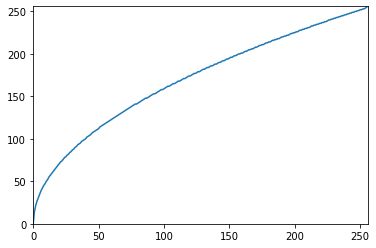

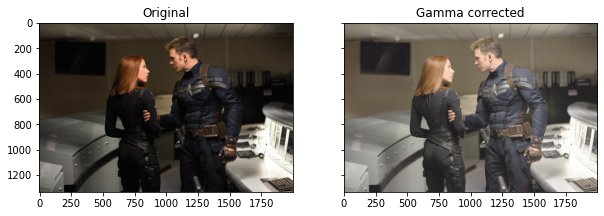

In [30]:
img = cv.imread('/content/drive/MyDrive/docements/CoLab files/a01images/im08.png' ,cv.IMREAD_COLOR)
img=cv.cvtColor(img, cv.COLOR_BGR2RGB)

gamma = 0.5
print('Gamma =' , gamma)
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_gamma = cv.LUT(img, table)

plt.plot(table)
plt.xlim([0,256])
plt.ylim([0,256])
plt.show()

fig, ax = plt.subplots(1,2,sharex='all', sharey='all', figsize=(10,10))
ax[0].imshow(img, cmap ='gray', vmin = 0, vmax = 255)
ax[0].set_title('Original')
ax[1].imshow(img_gamma, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('Gamma corrected')
plt.show()

#### e) Gaussian smoothing

Dimension of the kernel =  20
Sigma =  10


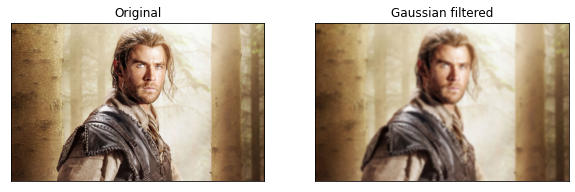

In [31]:
imgo=cv.imread('/content/drive/MyDrive/docements/CoLab files/a01images/im05.png', cv.IMREAD_COLOR)
img=cv.cvtColor(imgo, cv.COLOR_BGR2RGB)

dim_of_kernel =20      #Parameters of the kernel
sigma=10

print("Dimension of the kernel = ",dim_of_kernel )      #printing the parameters
print("Sigma = ",sigma)

kernel = cv.getGaussianKernel(dim_of_kernel, sigma)     # Using opencv builtin Function
filtered = cv.sepFilter2D(img, -1, kernel, kernel)

fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(10,10))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(filtered, cmap='gray')
axes[1].set_title('Gaussian filtered')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

#### f) Unsharp masking

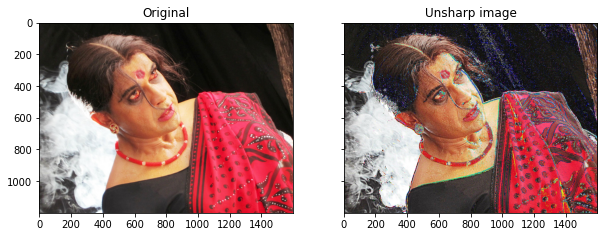

In [32]:
imgo=cv.imread('/content/drive/MyDrive/docements/CoLab files/a01images/im09.png', cv.IMREAD_COLOR)
img=cv.cvtColor(imgo, cv.COLOR_BGR2RGB)

sigmaX=sigmaY=sigma=2
n=2
kernel_size=9

g_img=cv.GaussianBlur(img,(25,25),cv.BORDER_DEFAULT)
unsharp_img=img+n*(img-g_img)

fig, ax = plt.subplots(1,2,sharex='all', sharey='all', figsize=(10,10))
ax[0].imshow(img, cmap ='gray', vmin = 0, vmax = 255)
ax[0].set_title('Original')
ax[1].imshow(unsharp_img, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('Unsharp image')
plt.show()

#### g) Median filtering

Kernel size =  25


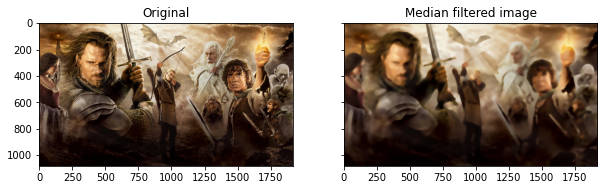

In [33]:
imgo=cv.imread('/content/drive/MyDrive/docements/CoLab files/a01images/im01.png', cv.IMREAD_COLOR)
img=cv.cvtColor(imgo, cv.COLOR_BGR2RGB)

k_size=25
print("Kernel size = ", k_size)
mBlur_img=cv.medianBlur(img,k_size)

fig, ax = plt.subplots(1,2,sharex='all', sharey='all', figsize=(10,10))
ax[0].imshow(img, cmap ='gray', vmin = 0, vmax = 255)
ax[0].set_title('Original')
ax[1].imshow(mBlur_img, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('Median filtered image')
plt.show()

#### h) Bilateral filtering

In Gaussian smoothing we take a weighted average of pixel values in the neighborhood. The weights are inversely proportional to the distance from the center of the neighborhood. Besides these spatial weights, the bilateral filter adds a tonal weight such that pixel values that are close to the pixel value in the center are weighted more than pixel values that are more different.

This tonal weighting makes that the bilateral filter is capable of preserving edges (large differences in tonal value) while smoothing in the more flat regions (small tonal differences).

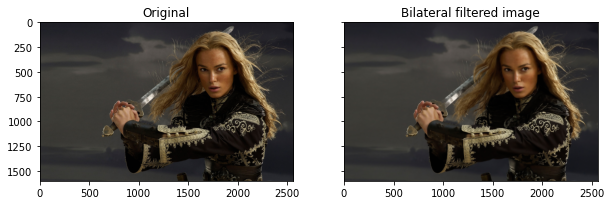

In [34]:
imgo=cv.imread('/content/drive/MyDrive/docements/CoLab files/a01images/im07.png', cv.IMREAD_COLOR)
img=cv.cvtColor(imgo, cv.COLOR_BGR2RGB)

bFiltered_img=cv.bilateralFilter(img,14,75,75,borderType=cv.BORDER_CONSTANT)

fig, ax = plt.subplots(1,2,sharex='all', sharey='all', figsize=(10,10))
ax[0].imshow(img, cmap ='gray', vmin = 0, vmax = 255)
ax[0].set_title('Original')
ax[1].imshow(bFiltered_img, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('Bilateral filtered image')
plt.show()

## 2) Count the rice grains in the rice image

Number of rice grains =  114


NameError: ignored

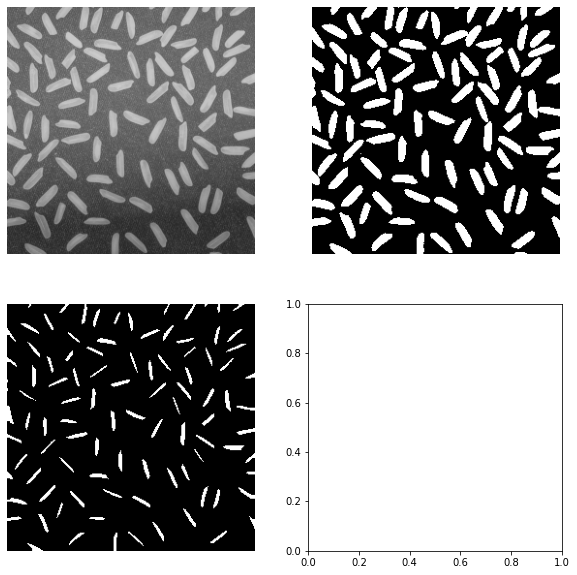

In [35]:
img = cv.imread('/content/drive/MyDrive/docements/CoLab files/a01images/rice.png', cv.IMREAD_GRAYSCALE)

adapthresh_img = cv.adaptiveThreshold (img, 255.0,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 51, -20.0)    # using adaptive thresholding 

kernel = np.ones((5,5),np.uint8)       # removeing the white dots using erode interatively 
erosion_img = cv.erode(adapthresh_img, kernel)

processing_img = erosion_img.copy()     # counting the pixel with value =255 and then filling the connected pixels to stop recounting 
rice_count = 0
rows, cols = processing_img.shape
for j in range(rows):
    for i in range(cols):
        pixel = processing_img[j, i]
        if 255 == pixel:
            rice_count += 1
            cv.floodFill(processing_img, None, (i, j), rice_count)
print("Number of rice grains = ", rice_count)

#Show connected components using a color Map
#(min, max, minLoc, maxLoc) = cv.minMaxLoc(pro_imgage) #get max,min pixels
#pro_imgage = (255/(max-min)) * (pro_imgage - min)   # Normalize
#imgColorMap = cv.applyColorMap(pro_imgage.astype('uint8'), cv.COLORMAP_RAINBOW) #create color map
#imgColorMap[pro_imgage==0] = 0 #set the backroud as black

fig,ax = plt.subplots(2,2,  figsize=(10,10))
ax[0,0].imshow(cv.cvtColor(img,  cv . COLOR_BGR2RGB))
ax[0,0].axis("off")
ax[0,1].imshow(cv.cvtColor(adapthresh_img,  cv . COLOR_BGR2RGB))
ax[0,1].axis("off")
ax[1,0].imshow(cv.cvtColor(erosion_img,  cv . COLOR_BGR2RGB))
ax[1,0].axis("off")
ax[1,1].imshow(cv.cvtColor(imgColorMap,  cv . COLOR_BGR2RGB))
ax[1,1].axis("off")

## 3) Zoom images by a given factor
#### a) Nearest neighbour

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math
scaling_Factor = 4
scale =4

def Nearest_Neighbour(image,s_fac):
    if len(img.shape)==2: # for grayscale image
        dim = np.multiply(img.shape,(scale,scale))
        result = np.zeros(dim)
        for i in range(0,dim[0]):
            for j in range(0,dim[1]):
                result[i,j] = image[int(math.floor(i/scale)),int(math.floor(j/scale))]
    if len(img.shape)==3: #for color image
        dim = np.multiply(img.shape,(scale,scale,1))
        result = np.zeros(dim)
        for i in range(0,dim[0]):
            for j in range(0,dim[1]):
                result[i,j] = image[int(math.floor(i/scale)),int(math.floor(j/scale))]
    return np.uint8(result)

img= cv.imread('/content/drive/MyDrive/docements/CoLab files/a01images/im02small.png',cv.IMREAD_COLOR)
scaled_image = Nearest_Neighbour(img,scaling_Factor)
h1,w1,a1 = img.shape
print (h1,w1)
h,w,a = scaled_image.shape
print (h,w)

fig, ax = plt.subplots(1,2,sharex='all', sharey='all', figsize=(10,10))
ax[0].imshow(img, cmap ='gray', vmin = 0, vmax = 255)
ax[0].set_title('Original')
ax[1].imshow(scaled_image, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('Scaled image')
plt.show()

#### b) Bilinear interpolation

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math
scale = 4

def Bilinear_Interpolation(image,s_fac):
    dim = np.multiply(image.shape,(s_fac,s_fac)) #create the resultant image
    result = np.zeros(dim)
    for i in range(0,image.shape[0]):
        for j in range(0,image.shape[1]):
            result[i*s_fac,j*s_fac] = image[i,j] #fill the cells of resultant image with a gap of scale
    for i in range(0,dim[0]-s_fac):
        for j in range(0,dim[1]-s_fac):  
            if( (i%s_fac != 0) or (j%s_fac != 0)):  #take a 2x2 grid 
                h00 = result[int(math.floor(i/scale))*scale , int(math.floor(j/scale))*scale] #base value
                h01 = result[int(math.floor(i/scale)+1)*scale , int(math.floor(j/scale))*scale]
                h10 = result[int(math.floor(i/scale))*scale , int(math.floor(j/scale)+1)*scale]
                h11 = result[int(math.floor(i/scale)+1)*scale ,int(math.floor(j/scale)+1)*scale]
                grad_y = math.modf(j/scale)[0]
                grad_x = math.modf(i/scale)[0]
                base = h00  
                diff_x = h01-h00
                diff_y = h10-h00
                diff_xy= h00-h10-h01+h11
                result[i,j] = base + diff_x*grad_x + diff_y*grad_y + diff_xy*grad_x*grad_y
    return result.astype('uint8')

def bilinear_Scaling(img,s_fac):
    if len(img.shape)==2: # for grayscale image
        o_row,o_col =img.shape
        row=o_row*s_fac
        col=o_col*s_fac
        out_img=np.zeros((row,col),np.uint8)
    if len(img.shape)==3: #for color image
        o_row,o_col,channels =img.shape
        row=o_row*s_fac
        col=o_col*s_fac
        out_img=np.zeros((row,col,channels),np.uint8)

    sh=row/o_row
    sw=col/o_col
    for i in range(row):
        for j in range(col):
            x = i/sh
            y = j/sw
            p=(i+0.0)/sh-x
            q=(j+0.0)/sw-y
            x=int(x)-1
            y=int(y)-1
            out_img[i, j] =(img[x,y]*(1-p)*(1-q)+img[x,y+1]*q*(1-p)+img[x+1,y]*(1-q)*p+img[x+1,y+1]*p*q)
    return out_img   
        
img = cv.imread('/content/drive/MyDrive/docements/CoLab files/a01images/im06small.png',cv.IMREAD_COLOR)
scale = 4
Processed = bilinear_Scaling(img,scale)

fig, ax = plt.subplots(1,2,sharex='all', sharey='all', figsize=(10,10))
ax[0].imshow(img, cmap ='gray', vmin = 0, vmax = 255)
ax[0].set_title('Original')
ax[1].imshow(Processed, cmap = 'gray', vmin = 0, vmax = 255)
ax[1].set_title('Scaled image')
plt.show()

#### computing the sum of squared difference

In [ ]:
img1= cv.imread('/content/drive/MyDrive/docements/CoLab files/a01images/im02.png',cv.IMREAD_COLOR)
img2= cv.imread('/content/drive/MyDrive/docements/CoLab files/a01images/im06.png',cv.IMREAD_COLOR)
SSD_Nearest_neighbour=np.sum((img1-scaled_image)**2)
SSD_bilinear=np.sum((img2-Processed)**2)
print(SSD_Nearest_neighbour)
print(SSD_bilinear)